In [4]:
import pandas as pd
import re
from nltk.corpus import stopwords
from gensim import similarities
import math
import time
import datetime
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from openai.embeddings_utils import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
import gensim
from gensim import corpora
from nltk.stem.porter import *
from gensim import similarities
import tensorflow as tf
import tensorflow_hub as hub 
from nltk.stem.porter import * 
# Create a TFIDF reveset index
from gensim import models

In [112]:
df = pd.read_excel(r'C:\Users\Tina\OneDrive - Singapore Management University\SMU\Term 3\Text analytics\Project\amazon_review_processed_full.xlsx')

## Use TFIDF 

In [94]:
def stem_text(text):
    stemmer = PorterStemmer()
    words = text.split()  # Split the text into words
    stemmed_words = [stemmer.stem(word) for word in words]  # Apply stemming
    return ' '.join(stemmed_words)

df['review stem'] = df['Full review'].apply(stem_text)

stemmed_texts = df['review stem'].str.split()  # Split the stemmed text into lists of words
sgDictionary = corpora.Dictionary(stemmed_texts)

sgVectors = [sgDictionary.doc2bow(doc) for doc in stemmed_texts]
df['sgVectors'] = sgVectors 
sgIndex = similarities.SparseMatrixSimilarity(sgVectors, len(sgDictionary))
sgTFIDF = models.TfidfModel(sgVectors)
sgVectorsWithTFIDF = [sgTFIDF[vec] for vec in sgVectors]
sgIndexWithTFIDF = similarities.SparseMatrixSimilarity(sgVectorsWithTFIDF, len(sgDictionary))

df['sgVectorsWithTFIDF'] = sgVectorsWithTFIDF

In [99]:
def query(text):
    qList = text.split()  
    qLower = [w.lower() for w in qList]
    stemmer = PorterStemmer()
    qStemmed = [stemmer.stem(w) for w in qLower]
    qVector = sgDictionary.doc2bow(qStemmed)
    qVectorTFIDF = sgTFIDF[qVector]
    return qVectorTFIDF

In [ ]:
topics_samples= [
    'Setup', 
    'Connectivity', 
    'Customer Support', 
    'Print Quality', 
    'Print Speed', 
    'Ink supply and Cartridge', 
#     'Printer Hardware Robustness and sturdiness', 
    'Control Panel', 
    'Ease of Use', 
#     'Firmware', 
    'Business Services and Subscription', 
     'Paper jam'
]

In [101]:
qVectorTFIDF = query('Bad connection')
simTFIDF = sgIndexWithTFIDF[qVectorTFIDF]
df['TFIDF Similarity Score'] = simTFIDF
df_idf = df.sort_values(by = 'similarity_tfidf', ascending=False)

pd.set_option('display.max_columns',None)
df_idf.head(5) 

,Review Model,Retailer,Review date,Review name,Review rating,Review title,Review Content,Verified Purchase or not,People_find_helpful,vine or not,URL,list price,rating count,overall rating,Original title,Original review,content_word_count,title_word_count,content_char_count,title_char_count,content_avg_word,title_avg_word,content_stopwords,title_stopwords,Brand,Full review,ID,review stem,sgVectors,sgVectorsWithTFIDF,similarity_raw,similarity_tfidf,TFIDF Similarity Score
9825,Epson - ET-4850,Amazon,2022-08-02,Ronel Calvert,3,NaN,bad internet connect,True,0.0,False,https://www.amazon.com/product-reviews/B096N9JMXF/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2&filterByStar=three_star,549.99,23729,4.1,Printer,Bad internet conection,3,1,22,7,6.666667,7.000000,0,0,Epson,bad internet connect,9826,bad internet connect,"[(142, 1), (237, 1), (619, 1)]","[(142, 0.6820130917190348), (237, 0.33583767357981803), (619, 0.6496700699034389)]",0.816497,0.731340,0.731340
4216,HP OfficeJet Pro 9015e,Amazon,2021-12-30,Amazon Customer,4,NaN,bad price,True,0.0,False,https://www.amazon.com/product-reviews/B08QR6P8KV/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=7&filterByStar=four_star,289.99,53646,4.1,printer,Not bad printer for price,5,1,25,7,4.200000,7.000000,1,0,HP,bad price,4217,bad price,"[(566, 1), (619, 1)]","[(566, 0.5994112658035613), (619, 0.8004412123496468)]",0.500000,0.711055,0.711055
807,Epson - Workforce 3820,Amazon,2023-08-06,Jawad Aslam,1,unabl connect wifi,bad,True,0.0,False,https://www.amazon.com/product-reviews/B08DXBLK14/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=7&filterByStar=one_star,149.99,1274,4.1,unable to connect with wifi,very bad,2,5,8,27,3.500000,4.600000,1,2,Epson,unabl connect wifi bad,808,unabl connect wifi bad,"[(132, 1), (237, 1), (619, 1), (1370, 1)]","[(132, 0.35046231136003675), (237, 0.28111635642725974), (619, 0.5438129706662936), (1370, 0.7088139497783204)]",0.707107,0.612176,0.612176
4807,HP DeskJet 2755e,Amazon,2023-08-10,Christian Rodriguez,2,bad,keep restart,True,0.0,False,https://www.amazon.com/product-reviews/B08XYP6BJV/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=9&filterByStar=two_star,139.99,53646,4.1,Bad printer,Keep having to restart after one print,7,2,38,11,4.571429,5.000000,3,0,HP,bad keep restart,4808,bad keep restart,"[(112, 1), (619, 1), (701, 1)]","[(112, 0.6875650042926288), (619, 0.5443111066242019), (701, 0.48060356228144413)]",0.408248,0.483527,0.483527
1882,HP ENVY Inspire 7955e,Amazon,2022-12-30,Michael Regina,1,realli bad,realli bad never work instal nightmar hi custom servic terribl avoid cost absolut garbag,True,0.0,False,https://www.amazon.com/product-reviews/B09BBLN72F/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=10&filterByStar=one_star,219.99,9872,4.2,Really Bad Printer,"This is a really bad printer. Never works, install was a nightmare, and HP's customer service is terrible. Avoid this printer at all cost. Absolute garbage.",29,3,159,18,5.038462,5.333333,9,0,HP,realli bad realli bad never work instal nightmar hi custom servic terribl avoid cost absolut garbag,1883,realli bad realli bad never work instal nightmar hi custom servic terribl avoid cost absolut garbag,"[(2, 1), (3, 1), (47, 1), (139, 1), (147, 1), (241, 1), (253, 1), (332, 1), (370, 1), (459, 2), (551, 1), (594, 1), (619, 2), (800, 1)]","[(2, 0.15956199897498283), (3, 0.06927050803306446), (47, 0.25157639812205734), (139, 0.20945525559957995), (147, 0.2032301028890576), (241, 0.21713513560586215), (253, 0.16301938078484482), (332, 0.2809203067696985), (370, 0.2830635491003294), (459, 0.36173543659382407), (551, 0.24792897067756198), (594, 0.30794886883096223), (619, 0.4571297916894165), (800, 0.3039593265967562)]",0.316228,0.406081,0.406081


In [83]:
# qVector = query('About connectivity')
# simRaw = sgIndex[qVector]
# simTFIDF = sgIndexWithTFIDF[qVectorTFIDF]

# df['similarity_raw'] = simRaw
# df['similarity_tfidf'] = simTFIDF

# df_raw = df.sort_values(by = 'similarity_raw', ascending=False)
# df_idf = df.sort_values(by = 'similarity_tfidf', ascending=False)

# pd.set_option('display.max_columns',None)
# df_raw.head(5) 

,Review Model,Retailer,Review date,Review name,Review rating,Review title,Review Content,Verified Purchase or not,People_find_helpful,vine or not,URL,list price,rating count,overall rating,Original title,Original review,content_word_count,title_word_count,content_char_count,title_char_count,content_avg_word,title_avg_word,content_stopwords,title_stopwords,Brand,Full review,ID,review stem,sgVectors,sgVectorsWithTFIDF,similarity_raw,similarity_tfidf
2652,HP DeskJet 4155e,Amazon,2023-02-09,NaN,4,connect issu,media could load stay connect stay connect con...,True,14.0,False,https://www.amazon.com/product-reviews/B08XYRD...,99.99,1391,4.2,Connection issues.,The media could not be loaded.\n ...,204,2,956,18,4.293103,8.500000,61,0,HP,connect issu media could load stay connect sta...,2653,connect issu media could load stay connect sta...,"[(3, 1), (12, 1), (14, 2), (17, 1), (22, 3), (...","[(3, 0.025145736848202965), (12, 0.08455851963...",0.710669,0.0
8350,Canon PIXMA MG3620,Amazon,2023-03-25,NaN,3,hard connect devic,connect took figur,True,0.0,False,https://www.amazon.com/Canon-MG3620-Wireless-P...,79.99,2251,4.2,Hard to connect to devices,Greta printer once you get it connected but to...,13,5,72,26,4.615385,4.400000,6,2,Canon,hard connect devic connect took figur,8351,hard connect devic connect took figur,"[(237, 2), (418, 1), (436, 1), (869, 1), (1091...","[(237, 0.47887953533620514), (418, 0.430656596...",0.707107,0.0
9657,Canon PIXMA MG3620,Amazon,2023-02-23,ReyRey,2,connect wirelessli,bought abl chromebook connect wirelessli work ...,True,0.0,False,https://www.amazon.com/Canon-MG3620-Wireless-P...,79.99,23729,4.1,Will not connect wirelessly,Bought this to be able to print from our chrom...,43,4,233,27,4.441860,6.000000,20,1,Canon,connect wirelessli bought abl chromebook conne...,9658,connect wirelessli bought abl chromebook conne...,"[(3, 1), (58, 1), (64, 1), (83, 1), (137, 1), ...","[(3, 0.06159033985839345), (58, 0.168478795492...",0.676123,0.0
1464,HP Smart Tank 7001,Amazon,2023-05-21,Nick,1,great rare occas stay connect,difficult connect comput even keep connect iss...,True,0.0,False,https://www.amazon.com/product-reviews/B09CJGF...,199.00,5251,4.1,Great Printer . . . On the Rare Occassion It S...,This printer is difficult to connect to a comp...,29,12,157,60,4.448276,4.083333,15,1,HP,great rare occas stay connect difficult connec...,1465,great rare occa stay connect difficult connect...,"[(1, 1), (93, 1), (100, 1), (192, 1), (195, 1)...","[(1, 0.12156451779174779), (93, 0.172226181284...",0.670820,0.0
6971,Canon PIXMA TR4720,Amazon,2022-09-29,William G. Gillam,3,network connect weak,troubl connect differ devic,True,0.0,False,https://www.amazon.com/product-reviews/B09CDXK...,99.99,800,4.2,Network connectivity is weak,I have trouble connecting from different devices.,7,4,49,28,6.142857,6.250000,2,1,Canon,network connect weak troubl connect differ devic,6972,network connect weak troubl connect differ devic,"[(95, 1), (129, 1), (237, 2), (418, 1), (540, ...","[(95, 0.3079469858449324), (129, 0.36745084740...",0.666667,0.0


In [102]:
columns = ['Review Model', 'Review date', 'Review name',
       'Review rating', 
           'Original title', 'Original review',  'TFIDF Similarity Score'
      ]
df_final = df_idf[columns]

In [109]:
pd.set_option('display.width', 20)
df_final.head(3)

,Review Model,Review date,Review name,Review rating,Original title,Original review,TFIDF Similarity Score
9825,Epson - ET-4850,2022-08-02,Ronel Calvert,3,Printer,Bad internet conection,0.731340
4216,HP OfficeJet Pro 9015e,2021-12-30,Amazon Customer,4,printer,Not bad printer for price,0.711055
807,Epson - Workforce 3820,2023-08-06,Jawad Aslam,1,unable to connect with wifi,very bad,0.612176


In [22]:
# df_final.to_csv('document_retrieval_update.csv') 

# Use tensorflow to embed

In [3]:
df 

,Review Model,Retailer,Review date,Review name,Review rating,Review title,Review Content,Verified Purchase or not,People_find_helpful,vine or not,...,title_word_count,content_char_count,title_char_count,content_avg_word,title_avg_word,content_stopwords,title_stopwords,Brand,Full review,ID
0,Canon Pixma TS6420a,Amazon,2023-08-10,Ernest Birkholz,5,work great,easi instal work great,True,0.0,False,...,2,38,11,3.875000,5.000000,3,0,Canon,work great easi instal work great,1
1,HP OfficeJet Pro 9015e,Amazon,2022-06-04,mattey,3,spunki mid size,slower speed im use old model 8600 new 9015e s...,True,0.0,False,...,4,460,23,4.835443,5.000000,19,0,HP,spunki mid size slower speed im use old model ...,2
2,Canon PIXMA MG3620,Amazon,2023-03-15,Maria D,4,NaN,i,True,0.0,False,...,2,7,12,3.000000,5.500000,0,0,Canon,i,3
3,Epson - ET-3830,Amazon,2022-11-17,Ryan H,5,shag know he talk,yup slam upgrad paid littl front equival throw...,True,12.0,False,...,6,469,34,4.595238,4.833333,31,2,Epson,shag know he talk yup slam upgrad paid littl f...,4
4,HP ENVY 6055e,Amazon,2022-04-09,Sam,3,user friendli,would think someth simpl reconnect wifi would ...,True,0.0,False,...,3,861,17,4.387500,5.000000,71,0,HP,user friendli would think someth simpl reconne...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10204,Epson - XP-6100,Amazon,2020-10-17,MD ZAKIR HOSSAIN,5,quick deliveri,can,True,0.0,False,...,2,3,14,3.000000,6.500000,0,0,Epson,quick deliveri can,10205
10205,Epson - Workforce 4820,Amazon,2022-10-13,mario aste,5,awesom,can,True,0.0,False,...,2,3,15,3.000000,7.000000,0,0,Epson,awesom can,10206
10206,Epson - Workforce 3820,Amazon,2023-07-26,111,1,work,can,True,0.0,False,...,2,3,11,3.000000,5.000000,0,0,Epson,work can,10207
10207,Epson - ET-2800,Amazon,2022-07-12,Margarita Rodriguez,1,el artículo leg root,can,True,0.0,False,...,4,3,22,3.000000,4.750000,0,0,Epson,el artículo leg root can,10208


In [113]:
df['Combined_text'] = df['Original review']+ df['Original title']

In [114]:
# # df = pd.read_excel(r'C:\Users\Tina\OneDrive - Singapore Management University\SMU\Term 3\Text analytics\Project\amazon_review JOIN.xlsx')
# #Use tensorflow to embed

df['Review Content new'] = df['Combined_text'].apply(lambda x: str(x) if x is not None else '') 

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

df['Cleaned Reviews'] = df['Review Content new'].apply(clean_text)

# def remove_stopwords(text):
#     stop_words = set(stopwords.words('english'))
#     words = text.split()
#     filtered_words = [word for word in words if word.lower() not in stop_words]
#     return ' '.join(filtered_words)

# df['Final Reviews'] = df['Cleaned Reviews'].apply(remove_stopwords)

model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")



In [115]:
df['Cleaned Reviews'] 

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           was easy to install and works greatworks great
1                                                                                                                            

In [117]:
def embed(text,model):
    embeddings = model(text)
    return [embedding.numpy() for embedding in embeddings]


df['Embed_sentence'] = embed(df['Full review'], model)
df['Embed_sentence_full'] = embed(df['Cleaned Reviews'], model)
df['Embed_sentence_full']

0                  [-0.06476055, -0.046573855, -0.027457241, 0.06322332, 0.070216216, -0.025670437, 0.050893664, -0.004295973, 0.03966454, 0.0054599927, -0.049052257, -0.032727037, -0.011888139, 0.025713963, 0.013434531, 0.08975346, 0.011625516, 0.06539028, -0.030184822, 0.05018931, -0.049441848, 0.03448917, -0.059821535, 0.020342916, -0.044016834, 0.0050706957, 0.034620825, 0.0055083036, -0.034311306, -0.016627306, 0.07001131, 0.030078024, -0.012592496, -0.008625138, -0.028716592, 0.07233813, 0.045581482, -0.042595785, 0.021744747, -0.0060381214, 0.0154395485, -0.051222473, 0.016993193, 0.05014672, 0.006472177, -0.07095797, -0.046874862, -0.030451862, -0.009931262, -0.0041217143, 0.007588667, -0.005515727, -0.04068433, -0.030772027, 0.05853296, -0.00013855337, 0.029832633, -0.0034011218, -0.014614559, 0.02438878, 0.053751674, 0.018763307, 0.03760518, 0.058118768, 0.08511807, 0.022973988, 0.05065482, 0.061361168, 0.05189148, 0.014992673, 0.017877309, 0.029545128, 0.046483662, -0.016950

In [140]:
def embed_label(text,model):
    embedding = model([text])
    return embedding.numpy()[0]

text = 'Bad Connection'
input_embedding_vector = embed_label(text,model)
# input_embedding_vector


In [141]:
import numpy as np
from numpy.linalg import norm
def cosine_similarity(embedding_vetor, embedding_label):
    similarity = np.dot(embedding_vetor,embedding_label)/(norm(embedding_vetor)*norm(embedding_label))
    return similarity

In [142]:
from tensorflow.keras.metrics import CosineSimilarity
def cosine_similarity_tensor(embedding_vetor, embedding_label):
    cosine_metric = tf.keras.metrics.CosineSimilarity(
    name='cosine_similarity', dtype=None, axis=-1)
    result = cosine_metric(embedding_vetor, embedding_label)
    return result

In [143]:
df['similarity'] = df['Embed_sentence'].apply(lambda x: cosine_similarity(input_embedding_vector,x))
df['similarity_tensor'] = df['Embed_sentence'].apply(lambda x: cosine_similarity_tensor(input_embedding_vector,x))

In [144]:
df['LLM_similarity_score'] = df['Embed_sentence_full'].apply(lambda x: cosine_similarity(input_embedding_vector,x))
# df['similarity_full_tensor'] = df['Embed_sentence_full'].apply(
#     lambda x: cosine_similarity_tensor(tf.convert_to_tensor([input_embedding_vector]), tf.convert_to_tensor(x))
# )

In [145]:
# embed stemmed title + review (remove stopwords)
pd.set_option('display.max_colwidth', None)
df_new = df.sort_values(by = 'similarity',ascending = False)
columns = ['Review Model', 'Review date', 'Review name',
       'Review rating', 'Full review',
       'Verified Purchase or not', 'People_find_helpful', 'vine or not',
       'list price', 'rating count', 'overall rating', 'Original title',
       'Original review',  'Brand','similarity'
      
      ]
df_select = df_new[columns]
df_final = df_select.head(4).reset_index(drop = True)
df_final

,Review Model,Review date,Review name,Review rating,Full review,Verified Purchase or not,People_find_helpful,vine or not,list price,rating count,overall rating,Original title,Original review,Brand,similarity
0,Epson - ET-4850,2022-08-02,Ronel Calvert,3,bad internet connect,True,0.0,False,549.99,23729,4.1,Printer,Bad internet conection,Epson,0.696432
1,HP OfficeJet Pro 9015e,2021-12-30,Amazon Customer,4,bad price,True,0.0,False,289.99,53646,4.1,printer,Not bad printer for price,HP,0.558766
2,HP Smart Tank 6001,2023-07-16,C. Brown,1,return connect problem,True,0.0,False,199.00,6269,4.1,Returned,Connection problems,HP,0.485372
3,HP DeskJet 2755e,2023-08-10,Christian Rodriguez,2,bad keep restart,True,0.0,False,139.99,53646,4.1,Bad printer,Keep having to restart after one print,HP,0.482689


In [146]:
# embed stemmed title + review with tensorflow similarity score, same result as above
pd.set_option('display.max_colwidth', None)
df_new = df.sort_values(by = 'similarity_tensor',ascending = False)
columns = ['Review Model', 'Review date', 'Review name',
       'Review rating', 'Full review',
       'Verified Purchase or not', 'People_find_helpful', 'vine or not',
       'list price', 'rating count', 'overall rating', 'Original title',
       'Original review',  'Brand','similarity'
      
      ]
df_select = df_new[columns]
df_final = df_select.head(4).reset_index(drop = True)
df_final

,Review Model,Review date,Review name,Review rating,Full review,Verified Purchase or not,People_find_helpful,vine or not,list price,rating count,overall rating,Original title,Original review,Brand,similarity
0,Epson - ET-4850,2022-08-02,Ronel Calvert,3,bad internet connect,True,0.0,False,549.99,23729,4.1,Printer,Bad internet conection,Epson,0.696432
1,HP OfficeJet Pro 9015e,2021-12-30,Amazon Customer,4,bad price,True,0.0,False,289.99,53646,4.1,printer,Not bad printer for price,HP,0.558766
2,HP Smart Tank 6001,2023-07-16,C. Brown,1,return connect problem,True,0.0,False,199.00,6269,4.1,Returned,Connection problems,HP,0.485372
3,HP DeskJet 2755e,2023-08-10,Christian Rodriguez,2,bad keep restart,True,0.0,False,139.99,53646,4.1,Bad printer,Keep having to restart after one print,HP,0.482689


In [147]:
# embed full review + title (not stem, include stopwords), better result
pd.set_option('display.max_colwidth', None)
df_new = df.sort_values(by = 'LLM_similarity_score',ascending = False)
columns = ['Review Model', 'Review date', 'Review name',
       'Review rating', 'Original title', 'Original review', 'LLM_similarity_score']
    
df_final = df_new[columns]

df_final = df_final.head(4).reset_index(drop = True)
df_final

,Review Model,Review date,Review name,Review rating,Original title,Original review,LLM_similarity_score
0,Epson - ET-4850,2022-08-02,Ronel Calvert,3,Printer,Bad internet conection,0.560805
1,HP Smart Tank 6001,2023-07-16,C. Brown,1,Returned,Connection problems,0.506350
2,Canon PIXMA TR4720,2022-09-29,William G. Gillam,3,Network connectivity is weak,I have trouble connecting from different devices.,0.445867
3,HP ENVY 6055e,2022-08-31,Julie K.,2,"Constantly has connection problems, paper jams, etc.","The quality is fine when it actually works. But I have wasted SO much time trying to fix various connection errors, etc. since I bought it a year ago. Currently trying to fix a paper jam. Not an easy-to-use product.",0.423644


# LDA

In [9]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
df 

,Review Model,Retailer,Review date,Review name,Review rating,Review title,Review Content,Verified Purchase or not,People_find_helpful,vine or not,...,title_avg_word,content_stopwords,title_stopwords,Brand,Full review,ID,review stem,sgVectors,sgVectorsWithTFIDF,similarity_tfidf
0,Canon Pixma TS6420a,Amazon,2023-08-10,Ernest Birkholz,5,work great,easi instal work great,True,0.0,False,...,5.000000,3,0,Canon,work great easi instal work great,1,work great easi instal work great,"[(0, 1), (1, 2), (2, 1), (3, 2)]","[(0, 0.3429257452730982), (1, 0.67360169804685...",0.0
1,HP OfficeJet Pro 9015e,Amazon,2022-06-04,mattey,3,spunki mid size,slower speed im use old model 8600 new 9015e s...,True,0.0,False,...,5.000000,19,0,HP,spunki mid size slower speed im use old model ...,2,spunki mid size slower speed im use old model ...,"[(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1...","[(4, 0.1571854474374913), (5, 0.15224009718499...",0.0
2,Canon PIXMA MG3620,Amazon,2023-03-15,Maria D,4,NaN,i,True,0.0,False,...,5.500000,0,0,Canon,i,3,i,"[(46, 1)]","[(46, 1.0)]",0.0
3,Epson - ET-3830,Amazon,2022-11-17,Ryan H,5,shag know he talk,yup slam upgrad paid littl front equival throw...,True,12.0,False,...,4.833333,31,2,Epson,shag know he talk yup slam upgrad paid littl f...,4,shag know he talk yup slam upgrad paid littl f...,"[(0, 1), (1, 1), (21, 1), (47, 1), (48, 1), (4...","[(0, 0.05220602808410785), (1, 0.0512735915142...",0.0
4,HP ENVY 6055e,Amazon,2022-04-09,Sam,3,user friendli,would think someth simpl reconnect wifi would ...,True,0.0,False,...,5.000000,71,0,HP,user friendli would think someth simpl reconne...,5,user friendli would think someth simpl reconne...,"[(0, 1), (1, 1), (22, 1), (42, 1), (48, 1), (7...","[(0, 0.04128587302779661), (1, 0.0405484781475...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10204,Epson - XP-6100,Amazon,2020-10-17,MD ZAKIR HOSSAIN,5,quick deliveri,can,True,0.0,False,...,6.500000,0,0,Epson,quick deliveri can,10205,quick deliveri can,"[(609, 1), (613, 1), (1738, 1)]","[(609, 0.5527104223677787), (613, 0.5383247528...",0.0
10205,Epson - Workforce 4820,Amazon,2022-10-13,mario aste,5,awesom,can,True,0.0,False,...,7.000000,0,0,Epson,awesom can,10206,awesom can,"[(609, 1), (1364, 1)]","[(609, 0.6906019395778284), (1364, 0.723235066...",0.0
10206,Epson - Workforce 3820,Amazon,2023-07-26,111,1,work,can,True,0.0,False,...,5.000000,0,0,Epson,work can,10207,work can,"[(3, 1), (609, 1)]","[(3, 0.23625677137062873), (609, 0.97169065961...",0.0
10207,Epson - ET-2800,Amazon,2022-07-12,Margarita Rodriguez,1,el artículo leg root,can,True,0.0,False,...,4.750000,0,0,Epson,el artículo leg root can,10208,el artículo leg root can,"[(609, 1), (694, 1), (2388, 1), (2880, 1), (35...","[(609, 0.2832097470684773), (694, 0.2514926404...",0.0


In [17]:
df_negative = df[df['Review rating'].isin([1, 2])]

In [18]:
vectorizer = CountVectorizer()
sg_vecs = vectorizer.fit_transform(df_negative['review stem'])

feature_names = vectorizer.get_feature_names_out() 

In [19]:
# Build LDA Model
sg_lda = LatentDirichletAllocation(n_components=5,               # Number of topics
                                      learning_method='online',   
                                      n_jobs = -1)              # use all available CPU
lda_output = sg_lda.fit_transform(sg_vecs)

In [26]:
import nltk
from nltk.stem import WordNetLemmatizer

# nltk.download('wordnet')

def display_topics(model, feature_names, no_top_words):
    lemmatizer = WordNetLemmatizer()
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        # Lemmatize and print the top N words for each topic.
        words = [lemmatizer.lemmatize(feature_names[i]) for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(" ".join(words))

no_top_words = 15
display_topics(sg_lda, feature_names, no_top_words)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic 0:
cartridg support epson work would new buy replac call custom purcha tri servic return time
Topic 1:
work buy month dont never time money instant subscript ever wast program bought connect tri
Topic 2:
connect scan app work wifi tri comput time setup instal softwar smart would network wireless
Topic 3:
card box cartridg credit arriv ship insid return miss damag broken packag plan can amazon
Topic 4:
page time print qualiti jam like color tray everi photo good document need tri black


Topic 0:
cartridg support epson work would new buy replac call custom


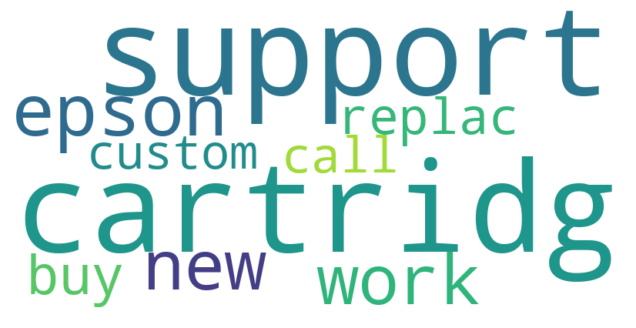

Topic 1:
work buy month dont never time money instant subscript ever


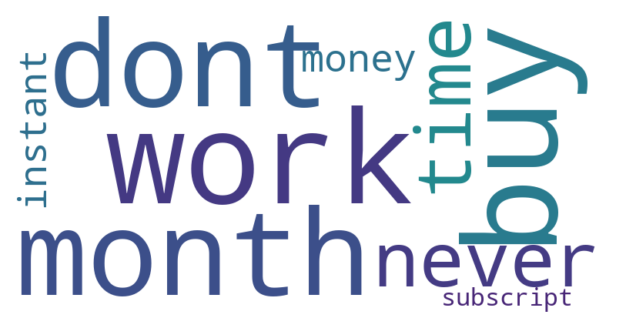

Topic 2:
connect scan app work wifi tri comput time setup instal


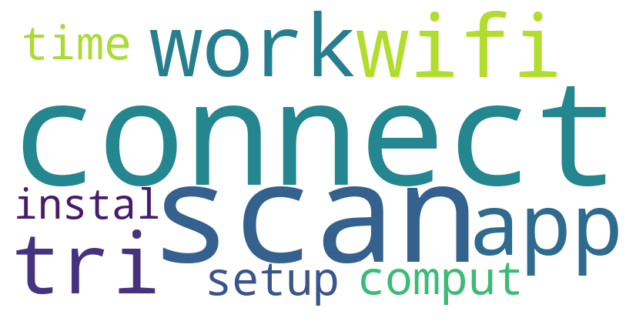

Topic 3:
card box cartridg credit arriv ship insid return miss damag


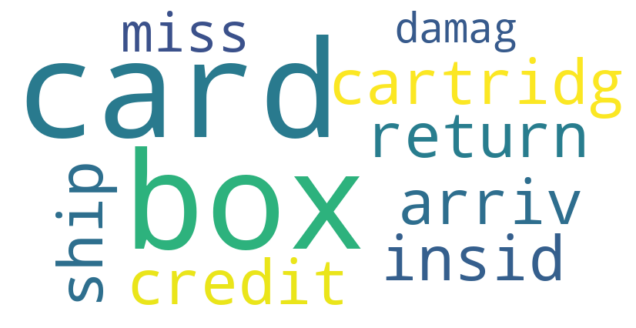

Topic 4:
page time print qualiti jam like color tray everi photo


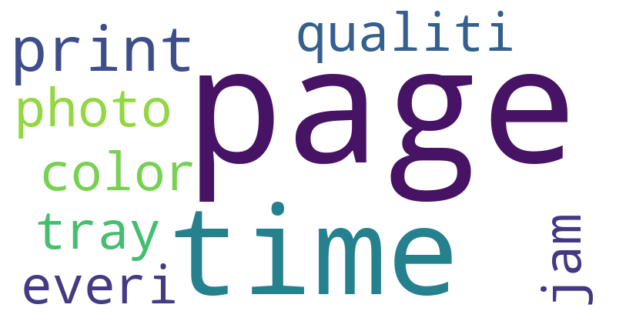

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer

def display_topics(model, feature_names, no_top_words):
    lemmatizer = WordNetLemmatizer()
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        top_words = [lemmatizer.lemmatize(feature_names[i]) for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(" ".join(top_words))  # Added a closing parenthesis here
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(top_words))
        
        plt.figure(figsize=(8, 4))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

no_top_words = 10
display_topics(sg_lda, feature_names, no_top_words)


In [37]:
# Can take a long time to run. In this case we are going to k_max=14.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
perplexity_values = []
model_topics = []

for num_topics in range(2, 6, 2):
    sg_lda_x = LatentDirichletAllocation(n_components=num_topics, learning_method='online', n_jobs = -1)
    sg_lda_x.fit_transform(sg_vecs)
    model_topics.append(num_topics)
    model_list.append(sg_lda_x)
    perplexity_values.append(sg_lda_x.perplexity(sg_vecs))
    print("No. of Topics: " + str(num_topics) + ", Score: " + str(sg_lda_x.perplexity(sg_vecs)))

print(datetime.datetime.now())

2023-10-20 21:29:08.234295
No. of Topics: 2, Score: 999.2720523070683
No. of Topics: 4, Score: 1016.9668364563255
2023-10-20 21:29:36.673949


In [47]:
def generate_N_grams(text,ngram=3):
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

In [52]:
data_words = df['review stem'].tolist()
bigram = gensim.models.Phrases(data_words, min_count=1, threshold=10)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)